In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
dataset = pd.read_csv('./wine.data')
dataset.columns = ['class','alcohol','malic acid','ash','alcalinity of ash','magnesium','total phenols','flavanoids','nonflavanoids phenols','proanthocyans','color intensity','hue','od280','proline']
dataset.columns
dataset.head()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoids phenols,proanthocyans,color intensity,hue,od280,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


<Axes: >

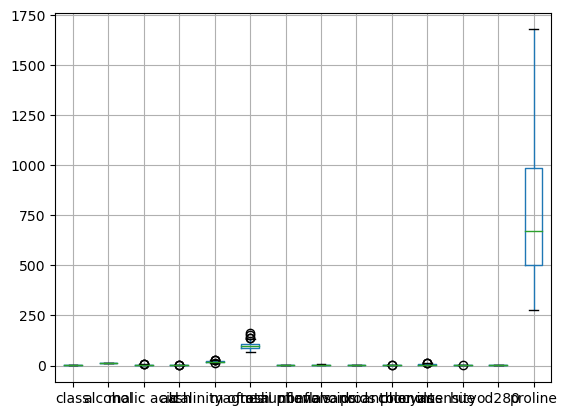

In [3]:
dataset.boxplot()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   class                  177 non-null    int64  
 1   alcohol                177 non-null    float64
 2   malic acid             177 non-null    float64
 3   ash                    177 non-null    float64
 4   alcalinity of ash      177 non-null    float64
 5   magnesium              177 non-null    int64  
 6   total phenols          177 non-null    float64
 7   flavanoids             177 non-null    float64
 8   nonflavanoids phenols  177 non-null    float64
 9   proanthocyans          177 non-null    float64
 10  color intensity        177 non-null    float64
 11  hue                    177 non-null    float64
 12  od280                  177 non-null    float64
 13  proline                177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
x = dataset.iloc[:,1:13]
y = dataset.iloc[:,0]

y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [6]:
# En este caso vamos a crear un entrenamiento para comparar la prediccción con otro resultado de prueba

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.70, random_state=3)

print("# Datos train:", x_train.count())
print("# Datos test:", x_test.count())

# Datos train: alcohol                  123
malic acid               123
ash                      123
alcalinity of ash        123
magnesium                123
total phenols            123
flavanoids               123
nonflavanoids phenols    123
proanthocyans            123
color intensity          123
hue                      123
od280                    123
dtype: int64
# Datos test: alcohol                  54
malic acid               54
ash                      54
alcalinity of ash        54
magnesium                54
total phenols            54
flavanoids               54
nonflavanoids phenols    54
proanthocyans            54
color intensity          54
hue                      54
od280                    54
dtype: int64


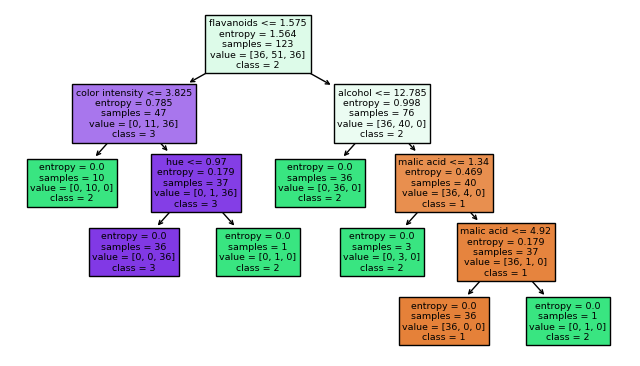

In [7]:
# Se entrena el árbol con los datos train

arbol = DecisionTreeClassifier(criterion="entropy",max_depth=7,min_samples_leaf=1, min_samples_split=5)

arbol.fit(x_train,y_train)

feature_names = list(map(str, x.columns.values))
class_names = list(map(str, y.unique()))

fig = plt.figure(figsize=(8, 4.5))
tree.plot_tree(arbol, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

In [8]:
# Se llama al método predict y se hace un paralelo visual de las 10 primeras filas
predict = arbol.predict(x_test)

print("Predicción hecha: ",predict[0:10].tolist())
print("Valores reales: ", y_test[0:10].tolist())

Predicción hecha:  [1, 1, 1, 2, 3, 1, 1, 1, 2, 1]
Valores reales:  [1, 1, 1, 2, 3, 1, 1, 2, 2, 1]


In [9]:
# Ahora medimos el accuracy del arbol
from sklearn.metrics import accuracy_score, confusion_matrix
print("Efectividad del modelo: ", accuracy_score(y_test, predict))
print("Matriz de confusión: \n", confusion_matrix(y_test, predict))

Efectividad del modelo:  0.9259259259259259
Matriz de confusión: 
 [[22  0  0]
 [ 4 16  0]
 [ 0  0 12]]


In [10]:
from sklearn.model_selection import GridSearchCV

# Buscamos los mejores hiperparametros para el modelo
# Definir los hiperparámetros que se desean ajustar y sus rangos
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(arbol, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

print(best_params)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
